In [36]:
# First, we can import some functions so we can use the model
from cobra.io import read_sbml_model, write_sbml_model
from cobra import Reaction, Metabolite
import matplotlib.pyplot as plt
from cobra.flux_analysis import production_envelope

In [2]:
# Second, we can read the GEM and save it as ‘model’
model = read_sbml_model('data/iML1515.xml')

In [31]:
# DIY PPP:

# ac_c <--ACKr--> actp_c <--PTAr--> accoa_c <--ACACT1r--> aacoa_c <--HACD1--> 3hbcoa_c --SK_3hbcoa_c--> p3HB

# Growth of E. coli with the heterologous pathway in a basal state (no Overexpression or KO's):
max_growth = model.optimize().objective_value

growth_basal_l = list()
p3HB_basal_l = list()
i = 1.0

while i > 0:

    # One way for dealing with production coupled to growth is to set biomass production boundaries so you force the model to at least produce a set amount of biomass when optimizing for a desired product.
    min_growth_total = i * max_growth  
    max_growth_total = 1.0 * max_growth   
    model.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M").bounds = min_growth_total, max_growth_total

    with model:
        r_p3HB = model.add_boundary(model.metabolites.get_by_id('3hbcoa_c'), type='sink')
        model.objective = r_p3HB
        solution_basal = model.optimize()
        p3HB_basal = solution_basal.objective_value
        growth_basal = solution_basal.fluxes["BIOMASS_Ec_iML1515_core_75p37M"]
    
    growth_basal_l.append(growth_basal)
    p3HB_basal_l.append(p3HB_basal)
    
    i -= 0.01

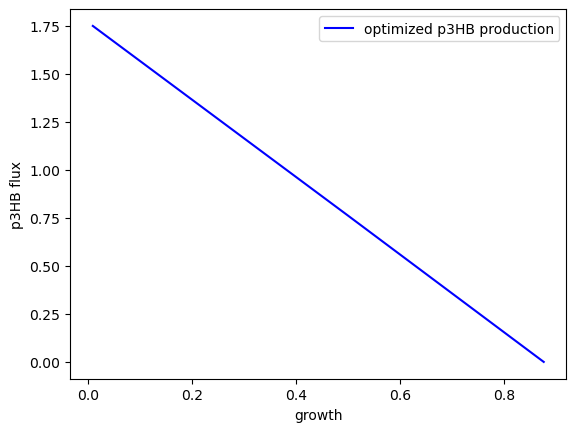

In [45]:
plt.plot(growth_basal_l, p3HB_basal_l, color='blue', linestyle='-', marker='', markersize=2, label='optimized p3HB production')

# Add labels and title
plt.xlabel('growth')
plt.ylabel('p3HB flux')

# Show the plot
plt.legend()
plt.show()

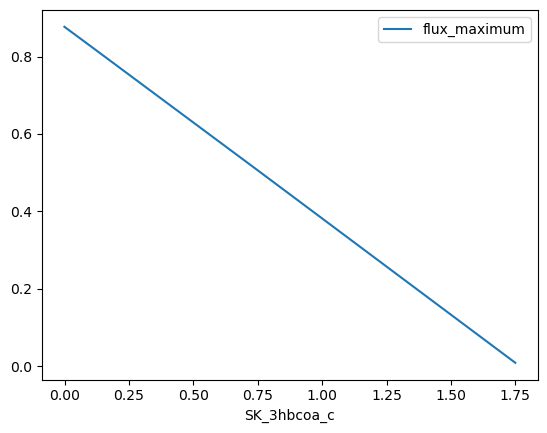

In [44]:
# PPP:
with model:
    r_p3HB = model.add_boundary(model.metabolites.get_by_id('3hbcoa_c'), type='sink')
    ppp_p3HB = production_envelope(model,
                        reactions=[model.reactions.get_by_id('SK_3hbcoa_c')],
                        objective=model.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M"))
    
pppp = ppp_p3HB.plot(x='SK_3hbcoa_c', y='flux_maximum')

Potser podem fer PPP de les overexpressions i dels KO. Ells conclouen que: 

In conclusion, we see some differences in the growth rate and the production of our product when we try the different knockouts, but this is quite marginal.

Thus, we will keep the model as-is.